In [46]:
import pandas as pd
import numpy as np
import matplotlib
import sklearn
import statsmodels
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.tools.eval_measures as  em
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.metrics import  mean_squared_error
from sklearn.linear_model import LinearRegression
from IPython.display import display
from pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA


problem :
    
For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

Data set for the Problem: Sparkling.csv and Rose.csv

Please do perform the following questions on each of these two data sets separately.


1. Read the data as an appropriate Time Series data and plot the data.

2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

3. Split the data into training and test. The test data should start in 1991.

4. Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

10. Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.

# Problem 1  : Dataset Sparkling.csv


##  Read the data as an appropriate Time Series data and plot the data.

In [47]:
df = pd.read_csv('Sparkling.csv')
df.head()

,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471


In [48]:
df.tail()

,YearMonth,Sparkling
182,1995-03,1897
183,1995-04,1862
184,1995-05,1670
185,1995-06,1688
186,1995-07,2031


In [49]:
date = pd.date_range(start='1/1/1980', periods=len(df), freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [50]:
df['Time_Stamp'] = date
df.head()

,YearMonth,Sparkling,Time_Stamp
0,1980-01,1686,1980-01-31
1,1980-02,1591,1980-02-29
2,1980-03,2304,1980-03-31
3,1980-04,1712,1980-04-30
4,1980-05,1471,1980-05-31


In [51]:
df.tail()

,YearMonth,Sparkling,Time_Stamp
182,1995-03,1897,1995-03-31
183,1995-04,1862,1995-04-30
184,1995-05,1670,1995-05-31
185,1995-06,1688,1995-06-30
186,1995-07,2031,1995-07-31


In [52]:
df.set_index('Time_Stamp',inplace=True,drop='Time_Stamp')
df.drop(labels='YearMonth', axis=1, inplace=True)
df.head()

,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


In [53]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,8

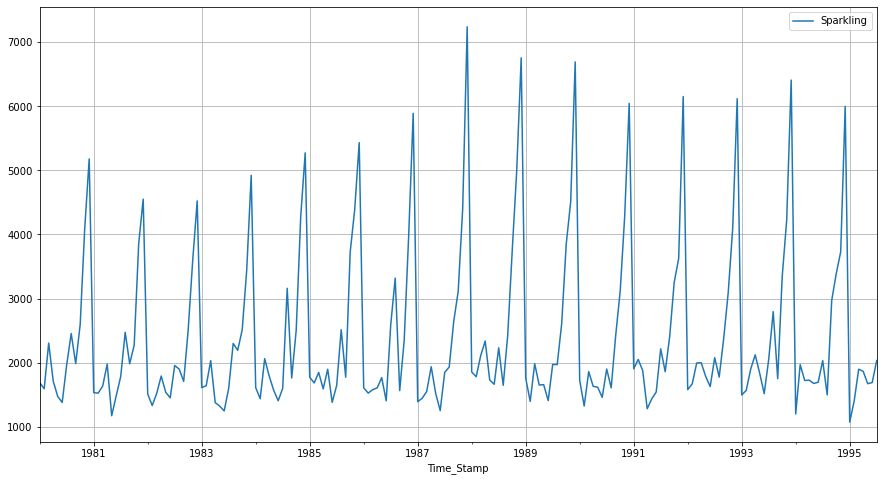

In [54]:
df.plot(grid=True);

## Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.



In [55]:
print("Basic Descriptive Stats of Time series ")

round(df.describe(),3)


Basic Descriptive Stats of Time series 


,Sparkling
count,187.000
mean,2402.417
std,1295.112
min,1070.000
25%,1605.000
50%,1874.000
75%,2549.000
max,7242.000


{'whiskers': [<matplotlib.lines.Line2D at 0x2c46de80370>,
 'caps': [<matplotlib.lines.Line2D at 0x2c46de80a30>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c46de81fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x2c46de69130>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c46de69430>],
 'means': []}

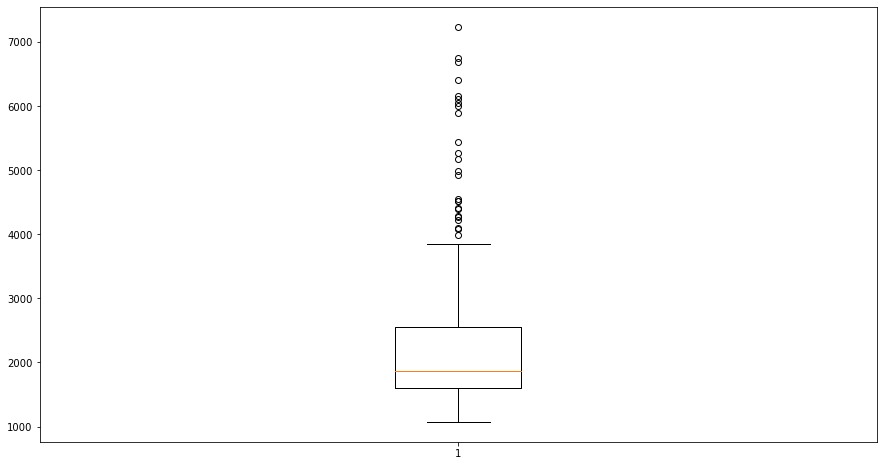

In [56]:
plt.boxplot(df)

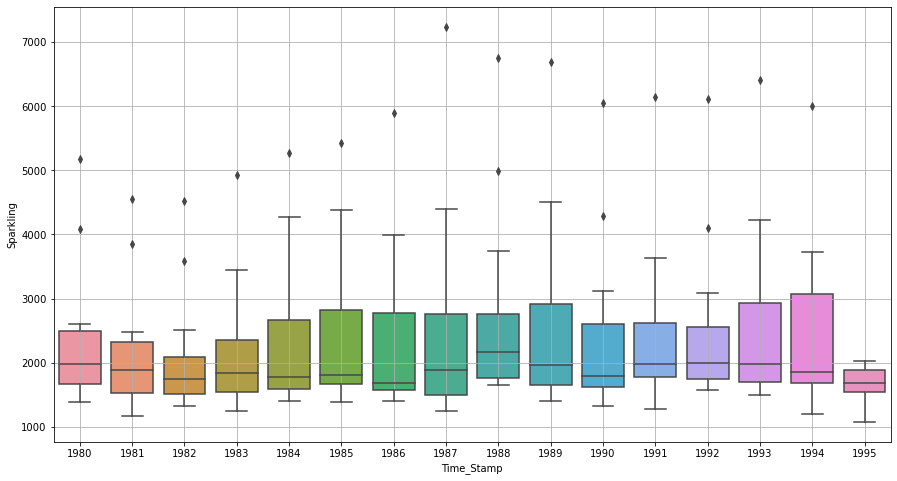

In [57]:
sns.boxplot(x = df.index.year,y = df['Sparkling'])
plt.grid();

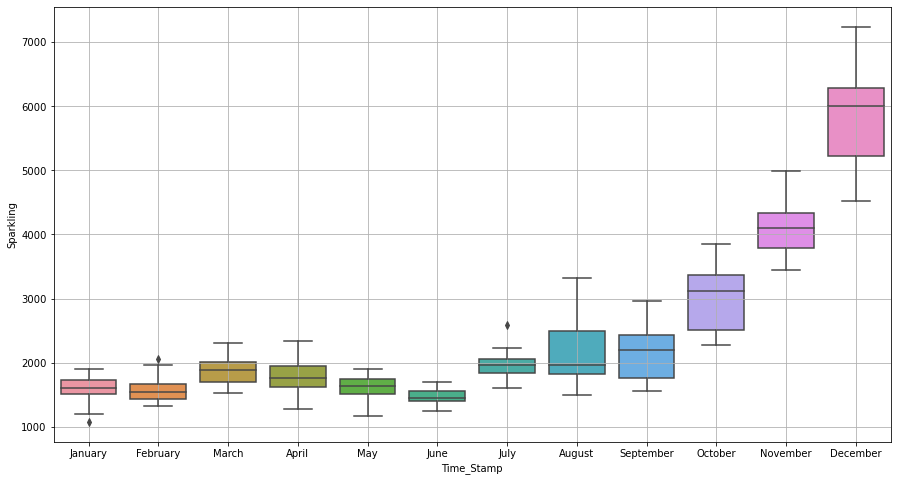

In [58]:
sns.boxplot(x = df.index.month_name(),y = df['Sparkling'])
plt.grid();

### Additive Decomposition

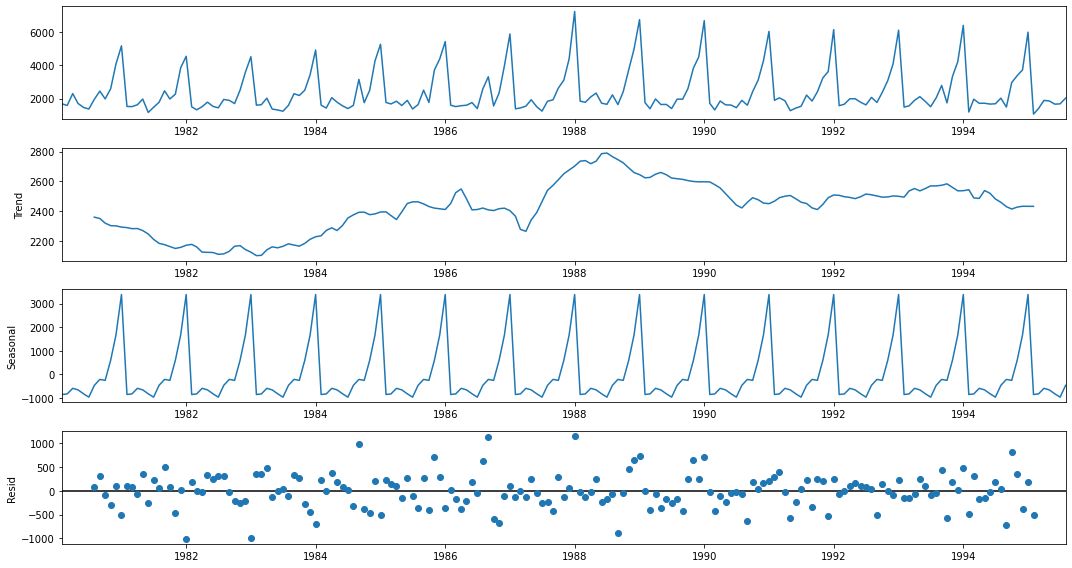

In [59]:
decomposition = seasonal_decompose(df,model='additive')
decomposition.plot();

In [60]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    -854.260599
1980-02-29    -830.350678
1980-03-31    -592.356630
1980-04-30    -658.490559
1980-05-31    -824.416154
1980-06-30    -967.434011
1980-07-31    -465.502265
1980-08-31    -214.332821
1980-09-30    -254.677265
1980-10-31     599.769957
1980-11-30    1675.067179
1980-12-31    3386.983846
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31     70.835599
1980-08-31    315.999487
1980-09-30    -81.864401
1980-10-31   -307.3532

In [61]:
### Multiplicative Decomposition

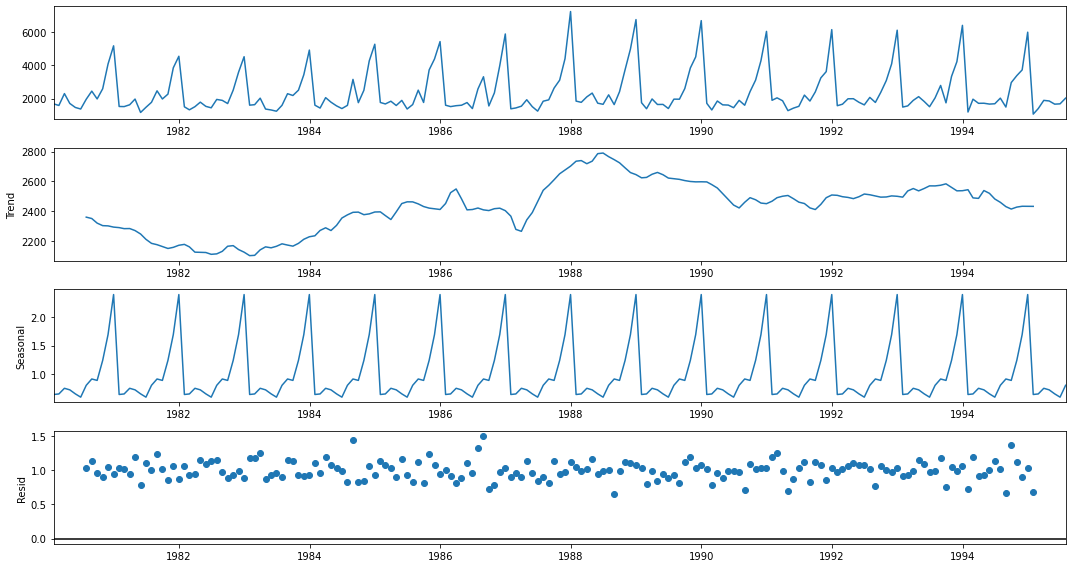

In [62]:
decomposition = seasonal_decompose(df,model='multiplicative')
decomposition.plot();

In [63]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
1980-06-30    0.603468
1980-07-31    0.809164
1980-08-31    0.918822
1980-09-30    0.894367
1980-10-31    1.241789
1980-11-30    1.690158
1980-12-31    2.384776
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    1.029230
1980-08-31    1.135407
1980-09-30    0.955954
1980-10-31    0.907513
1980-11-30    1.050423
1980-12-31    0.946770
Name: r

checking stationarity of whole data 

In [64]:
print("checking seasonlity on whole data ")
dftest = adfuller(df,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

if dftest[1] < 0.05 :
    print ("reject Null hypothesis  ie its stationary  (p value is < 0.05 (alpha)) ")
else :
    print("fail to reject null hypothesis . its not stationary (p value is > 0.05 (alpha)) ")

checking seasonlity on whole data 
DF test statistic is -1.798
DF test p-value is 0.7055958459932397
Number of lags used 12
fail to reject null hypothesis . its not stationary (p value is > 0.05 (alpha)) 


In [65]:
print( "Tyring to make data  stationary")
dftest = adfuller(df.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])
if dftest[1] < 0.05 :
    print ("reject Null hypothesis  ie its stationary  (p value is < 0.05 (alpha)) ")
else :
    print("fail to reject null hypothesis . its not stationary (p value is > 0.05 (alpha)) ")

Tyring to make data  stationary
DF test statistic is -44.912
DF test p-value is 0.0
Number of lags used 10
reject Null hypothesis  ie its stationary  (p value is < 0.05 (alpha)) 


Plotting data with differencing 


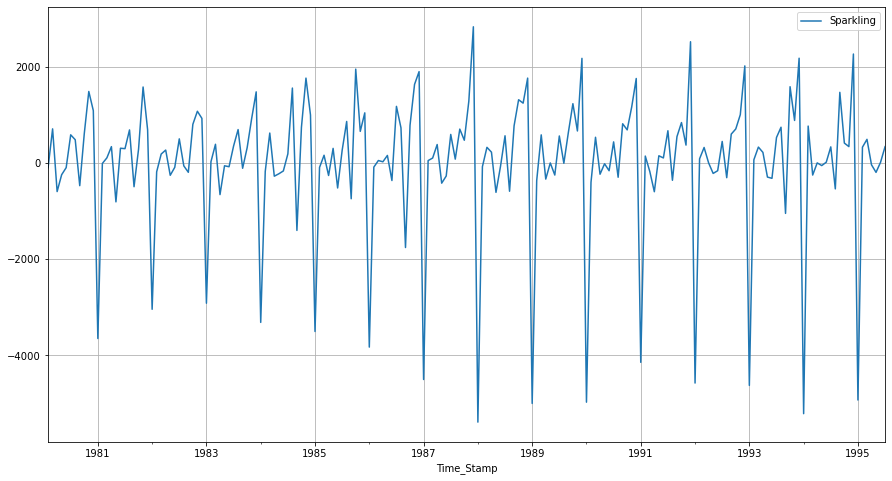

In [66]:
print("Plotting data with differencing ")
df.diff().dropna().plot(grid=True);

 Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

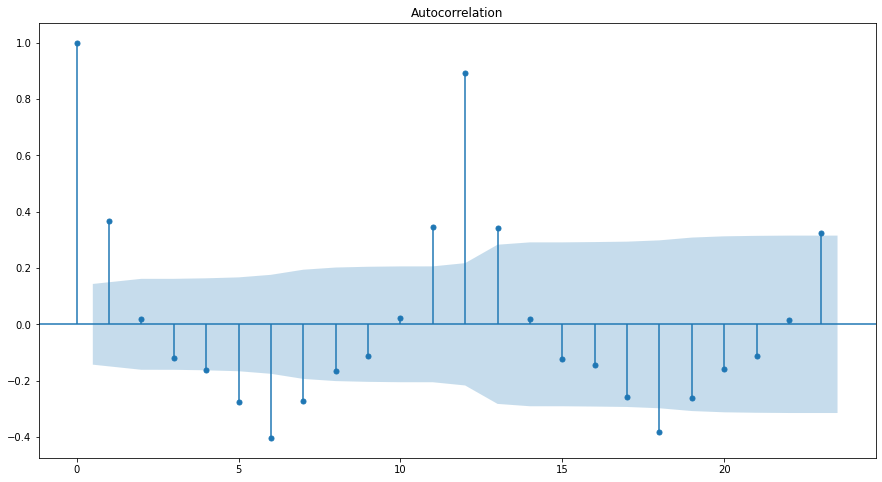

In [67]:
plot_acf(df,alpha=0.05);

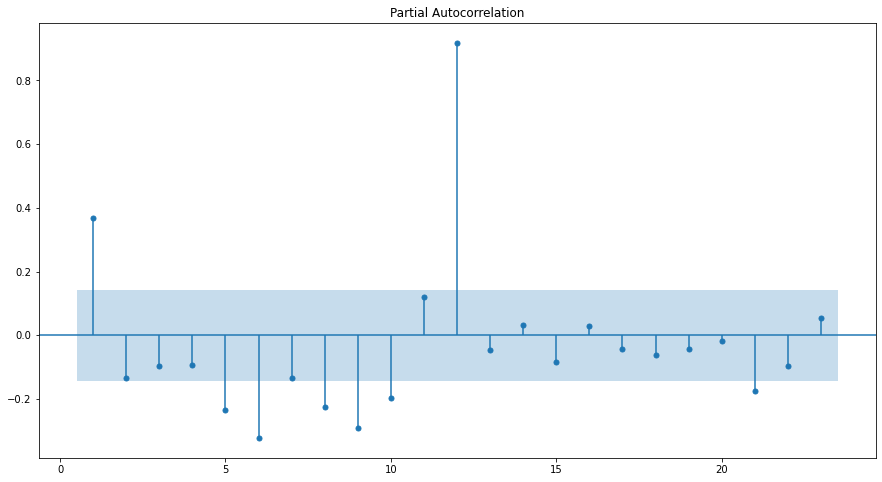

In [68]:
plot_pacf(df,zero=False,alpha=0.05);

## Split the data into training and test. The test data should start in 1991.

In [69]:
train             = df[df.index<'1991'] 
test              = df[df.index>='1991']

In [70]:
print("Head of train data ")
train.head()

Head of train data 


,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


In [71]:
print("Tail of train data ")
train.tail()


Tail of train data 


,Sparkling
Time_Stamp,
1990-08-31,1605
1990-09-30,2424
1990-10-31,3116
1990-11-30,4286
1990-12-31,6047


In [72]:
print("Head of test data ")
test.head()

Head of test data 


,Sparkling
Time_Stamp,
1991-01-31,1902
1991-02-28,2049
1991-03-31,1874
1991-04-30,1279
1991-05-31,1432


In [73]:
print("Tail of test data ")
test.tail()


Tail of test data 


,Sparkling
Time_Stamp,
1995-03-31,1897
1995-04-30,1862
1995-05-31,1670
1995-06-30,1688
1995-07-31,2031


## Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

### Simple Exponential Smoothing with additive errors

In [74]:
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

D:\anocondal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [75]:
model_SES_autofit = model_SES.fit(optimized=True)

D:\anocondal\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [76]:
model_SES_autofit.params

{'smoothing_level': 0.07028781460389563,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1763.9269926897732,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [77]:
SES_predict = model_SES_autofit.forecast(steps=len(test))


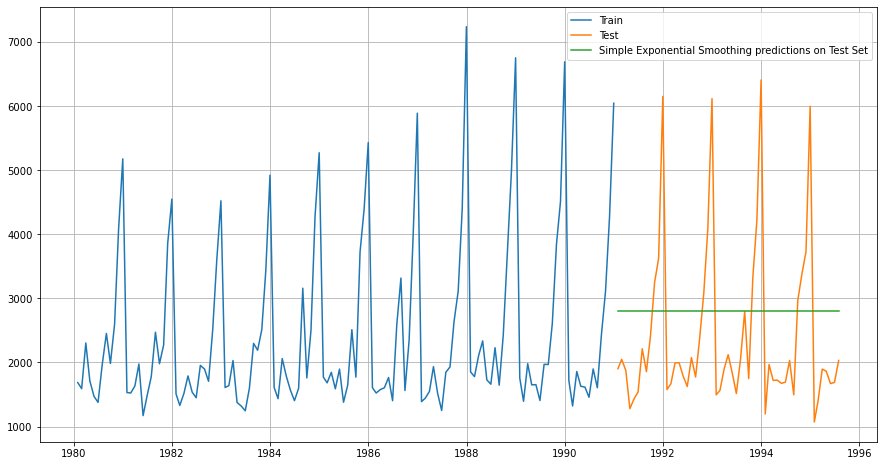

In [78]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()


In [79]:
print('SES RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))

SES RMSE: 1338.0046232563645


In [80]:
resultsDf = pd.DataFrame({'Test RMSE': [em.rmse(test.values,SES_predict.values)[0]]},index=['SES'])
resultsDf

,Test RMSE
SES,1338.004623


## Double Exponential Smoothing - Holt's linear method with additive errors

In [81]:
model_DES = Holt(train,initialization_method='estimated')

model_DES = model_DES.fit()


D:\anocondal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\anocondal\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [82]:
model_DES.params

{'smoothing_level': 0.6649999999999999,
 'smoothing_trend': 0.0001,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1502.1999999999998,
 'initial_trend': 74.87272727272733,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [83]:
DES_predict =  model_DES.forecast(len(test))

Text(0.5, 1.0, 'Double Exponential Smoothing Predictions')

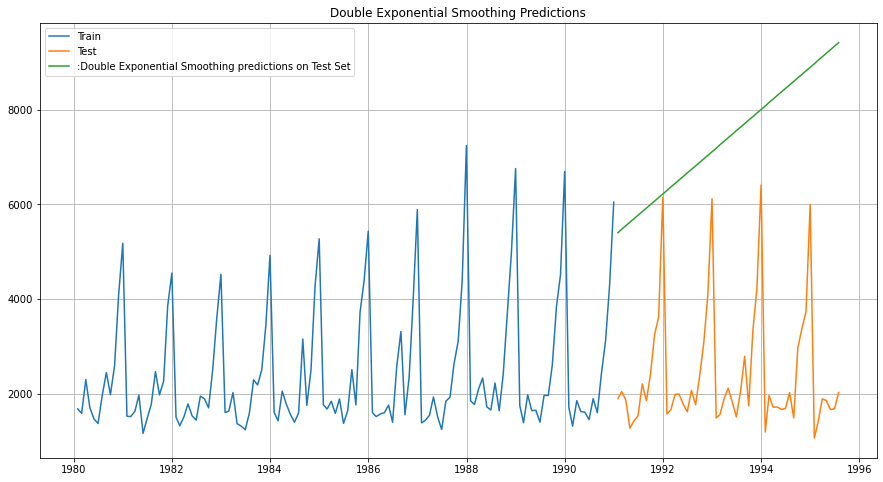

In [84]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')


plt.plot(DES_predict, label=':Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Double Exponential Smoothing Predictions')

In [85]:
print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 5291.879833226911


In [86]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['DES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
SES,1338.004623
DES,5291.879833


### Triple  Exponential Smoothing (addictive) - Holt Winter's linear method with additive errors

In [87]:
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
model_TES = model_TES.fit()
model_TES.params

D:\anocondal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


{'smoothing_level': 0.11127217859992398,
 'smoothing_trend': 0.01236078328796452,
 'smoothing_seasonal': 0.4607177642170641,
 'damping_trend': nan,
 'initial_level': 2356.578308185137,
 'initial_trend': -0.01853556812789492,
 'initial_seasons': array([-636.23360535, -722.98363367, -398.6436108 , -473.43084469,
        -808.42525514, -815.35024951, -384.23066987,   72.99508063,
        -237.44272911,  272.32584554, 1541.3782103 , 2590.0775386 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [88]:
TES_predict =  model_TES.forecast(len(test))

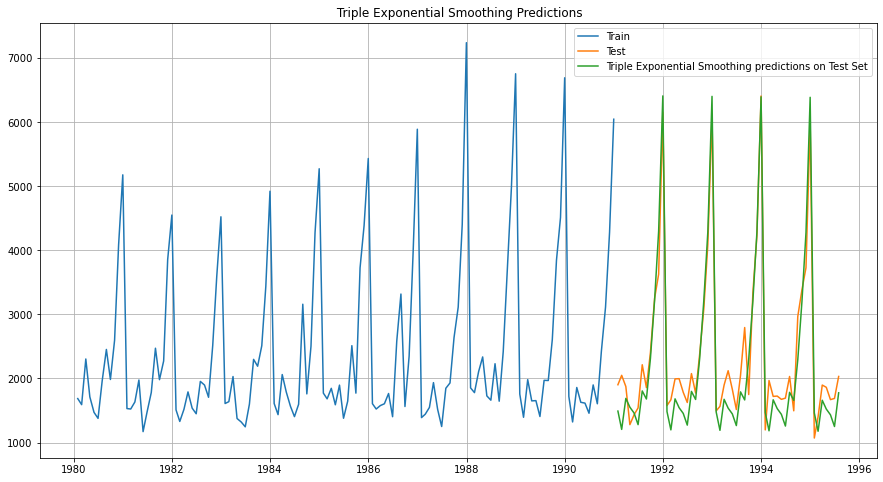

In [89]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')


plt.plot(TES_predict, label='Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title(' Triple Exponential Smoothing Predictions');

In [90]:
print('TES RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))

TES RMSE: 378.6262408893861


In [91]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['TES A'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
SES,1338.004623
DES,5291.879833
TES A,378.626241


###  Triple  Exponential Smoothing ( Seasonal Multiplicative)  - Holt Winter's linear method 

In [92]:
model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='multiplicative',initialization_method='estimated')
model_TES_am = model_TES_am.fit()

model_TES_am.params

D:\anocondal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


{'smoothing_level': 0.11119949831569428,
 'smoothing_trend': 0.049430920023313805,
 'smoothing_seasonal': 0.3620525701498937,
 'damping_trend': nan,
 'initial_level': 2356.5264391986907,
 'initial_trend': -9.443690175376352,
 'initial_seasons': array([0.71325627, 0.68332509, 0.90537798, 0.80561841, 0.65639659,
        0.65451508, 0.88690241, 1.13423953, 0.91927727, 1.21396745,
        1.86941738, 2.3734461 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [93]:
TES_predict_am =  model_TES_am.forecast(len(test))

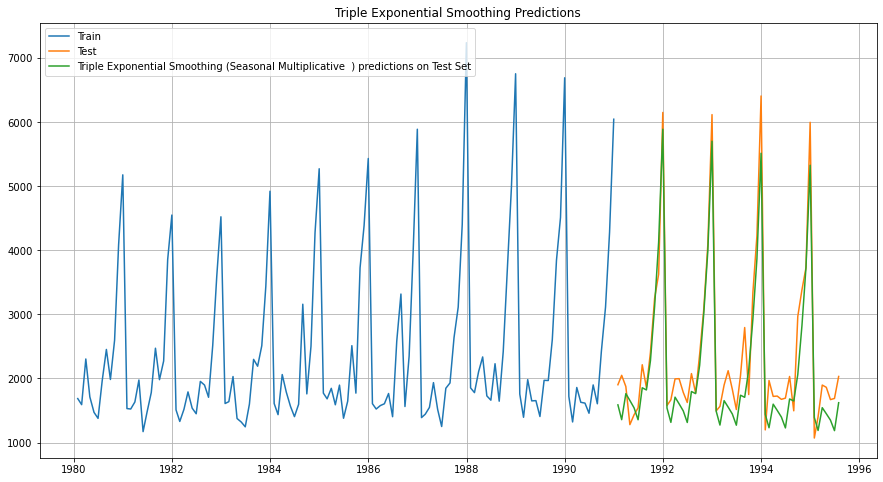

In [94]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')


plt.plot(TES_predict_am, label='Triple Exponential Smoothing (Seasonal Multiplicative  ) predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Predictions');

In [95]:
print('TES_am RMSE:',mean_squared_error(test.values,TES_predict_am.values,squared=False))

TES_am RMSE: 403.7062277856435


In [96]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
                           ,index=['TES SM'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
SES,1338.004623
DES,5291.879833
TES A,378.626241
TES SM,403.706228


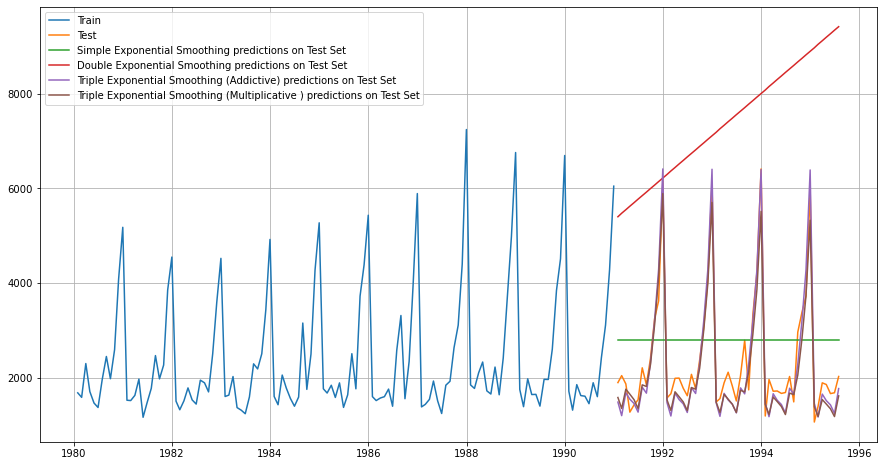

In [236]:
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(SES_predict, label='Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Triple Exponential Smoothing (Addictive) predictions on Test Set')
plt.plot(TES_predict_am, label='Triple Exponential Smoothing (Multiplicative ) predictions on Test Set')

plt.legend(loc='best')
plt.grid();

### Linear Regression

In [98]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [99]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [100]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time


In [101]:
LinearRegression_train.head()

,Sparkling,time
Time_Stamp,,
1980-01-31,1686,1
1980-02-29,1591,2
1980-03-31,2304,3
1980-04-30,1712,4
1980-05-31,1471,5


In [102]:
lr = LinearRegression()

In [103]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'])

LinearRegression()

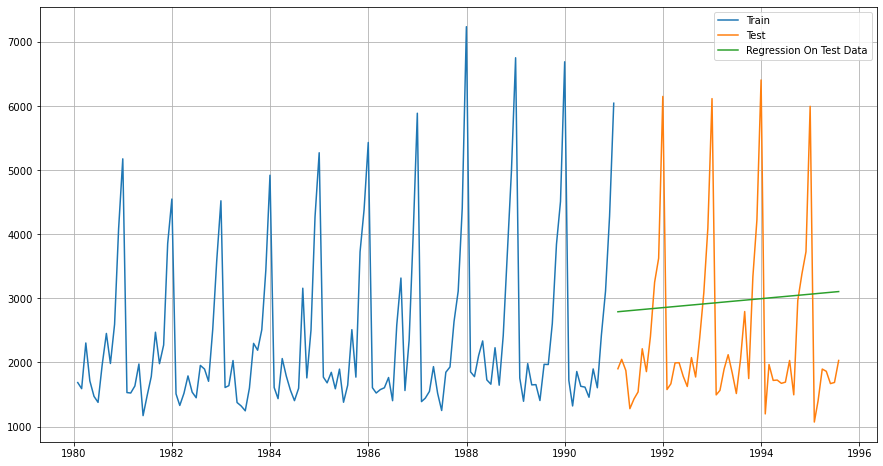

In [104]:
train_predictions_lr  = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['Regression'] = train_predictions_lr

test_predictions_lr   = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['Regression'] = test_predictions_lr

plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')


plt.plot(LinearRegression_test['Regression'], label='Regression On Test Data')


plt.legend(loc='best')
plt.grid();

In [105]:
rmse_lr_test = mean_squared_error(test['Sparkling'],test_predictions_lr,squared=False)
print("For Regression  forecast on the Test Data,  RMSE is %3.3f " %(rmse_lr_test))

For Regression  forecast on the Test Data,  RMSE is 1389.135 


In [106]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [rmse_lr_test]},index=['Regression'])
resultsDf = pd.concat([resultsDf, resultsDf_temp])

In [107]:
resultsDf

,Test RMSE
SES,1338.004623
DES,5291.879833
TES A,378.626241
TES SM,403.706228
Regression,1389.135175


### Naive Approach

In [108]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [109]:
train.tail()

,Sparkling
Time_Stamp,
1990-08-31,1605
1990-09-30,2424
1990-10-31,3116
1990-11-30,4286
1990-12-31,6047


In [110]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: naive, dtype: int64

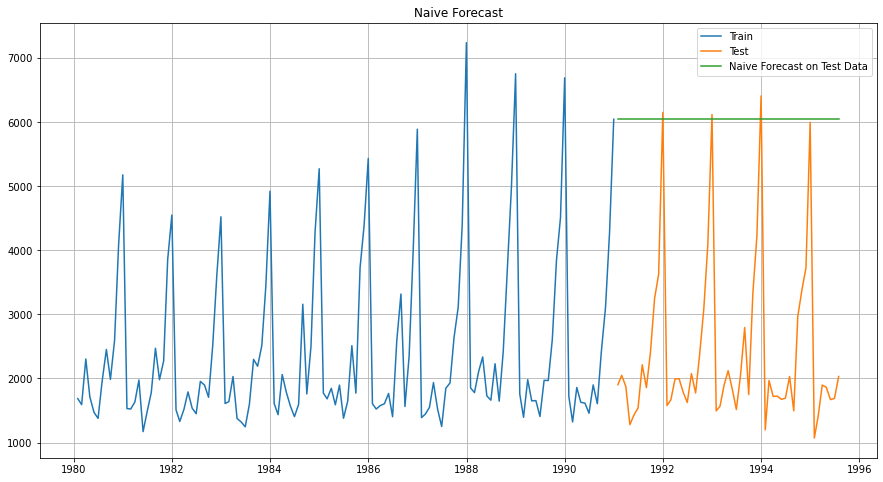

In [182]:
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [181]:
rmse_nm_test = mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For Naive forecast on the sparking Test Data,  RMSE is %3.3f" %(rmse_nm_test))

For Naive forecast on the sparking Test Data,  RMSE is 3864.279


In [113]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_nm_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
SES,1338.004623
DES,5291.879833
TES A,378.626241
TES SM,403.706228
Regression,1389.135175
NaiveModel,3864.279352


### Simple Average

In [114]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [115]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

,Sparkling,mean_forecast
Time_Stamp,,
1991-01-31,1902,2403.780303
1991-02-28,2049,2403.780303
1991-03-31,1874,2403.780303
1991-04-30,1279,2403.780303
1991-05-31,1432,2403.780303


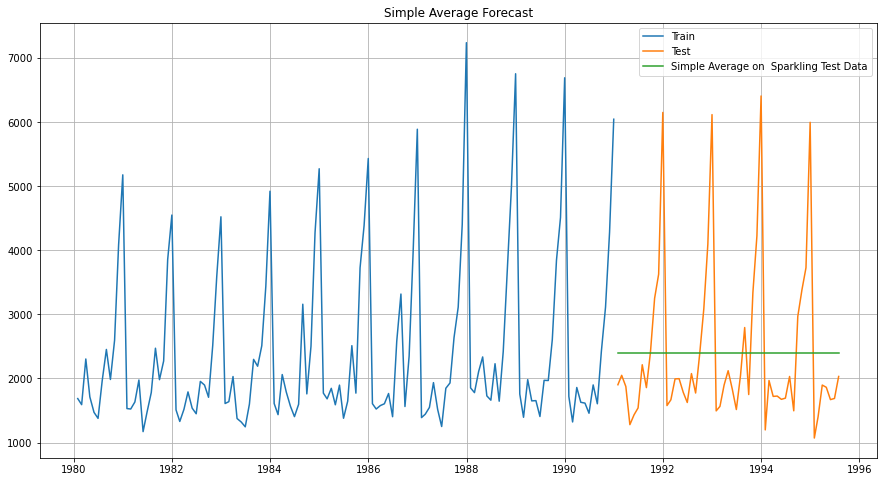

In [116]:
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on  Sparkling Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [117]:
rmse_sa_test = mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_sa_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082


In [118]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_sa_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
SES,1338.004623
DES,5291.879833
TES A,378.626241
TES SM,403.706228
Regression,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804


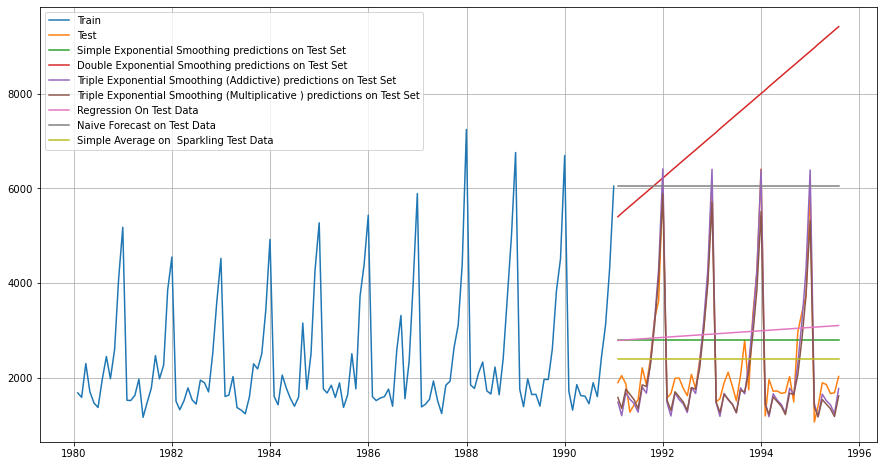

In [237]:

plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(SES_predict, label='Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Triple Exponential Smoothing (Addictive) predictions on Test Set')
plt.plot(TES_predict_am, label='Triple Exponential Smoothing (Multiplicative ) predictions on Test Set')
plt.plot(LinearRegression_test['Regression'], label='Regression On Test Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on  Sparkling Test Data')



plt.legend(loc='best')
plt.grid();

 ## Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

checking stationarity of training data 

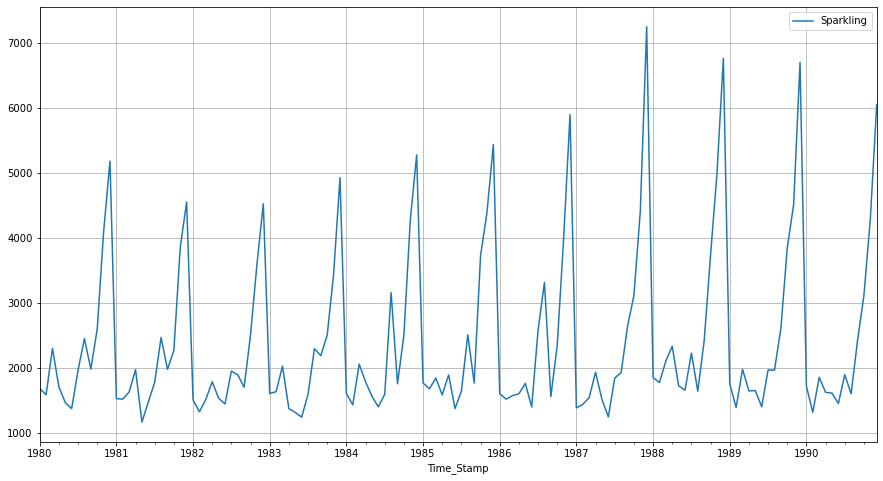

In [120]:
train.plot(grid=True);

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

In [121]:
dftest = adfuller(train,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

if dftest[1] < 0.05 :
    print ("reject Null hypothesis  ie its statioary ")
else :
    print("fail to reject null hypoathes . its not stationary ")
    

DF test statistic is -2.062
DF test p-value is 0.5674110388593719
Number of lags used 12
fail to reject null hypoathes . its not stationary 


The training data is non-stationary at 95% confidence level. Let us take a first level of differencing to stationarize the Time Series.

In [122]:
dftest = adfuller(train.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

if dftest[1] < 0.05 :
    print ("reject Null hypothesis  ie its statioary ")
else :
    print("fail to reject null hypoathes . its not stationary ")
    

DF test statistic is -7.968
DF test p-value is 8.479210655514579e-11
Number of lags used 11
reject Null hypothesis  ie its statioary 


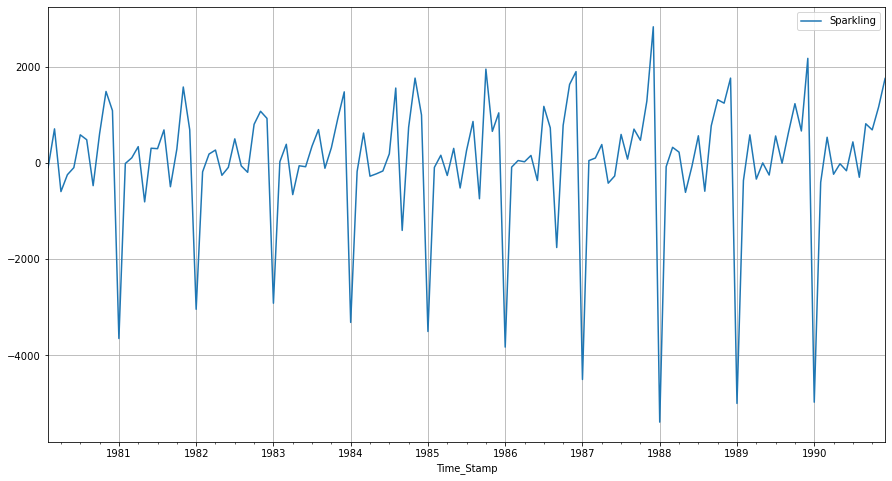

In [123]:
train.diff().dropna().plot(grid=True);

In [124]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-31 to 1990-12-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  132 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


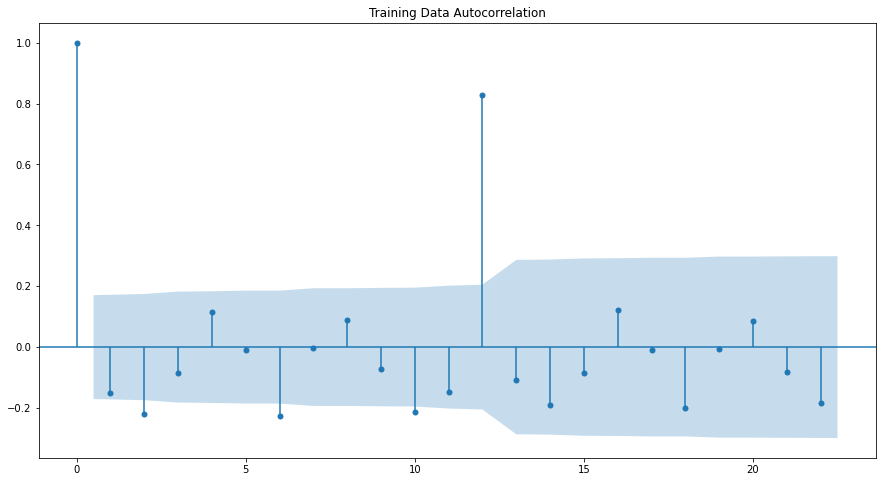

In [125]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop');

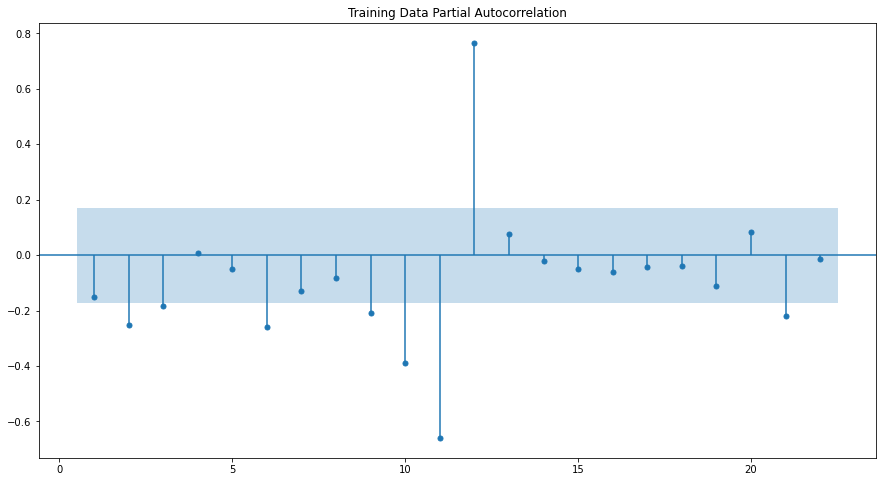

In [126]:
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False);

## Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

 Note: The data has some seasonality so ideally we should build a SARIMA model. But for reconformation I am  building an ARIMA model both by looking at the minimum AIC criterion and by looking at the ACF .

In [127]:
import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [128]:

ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [129]:

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.0600155922552
ARIMA(0, 1, 2) - AIC:2234.4083231242757
ARIMA(0, 1, 3) - AIC:2233.994857747629
ARIMA(1, 1, 0) - AIC:2266.608539319009
ARIMA(1, 1, 1) - AIC:2235.755094669173


D:\anocondal\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 1, 2) - AIC:2234.5272004516546
ARIMA(1, 1, 3) - AIC:2235.607808732252
ARIMA(2, 1, 0) - AIC:2260.3657439680865
ARIMA(2, 1, 1) - AIC:2233.777626209401
ARIMA(2, 1, 2) - AIC:2213.509212785536


D:\anocondal\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 3) - AIC:2232.8110262733007
ARIMA(3, 1, 0) - AIC:2257.723378997941
ARIMA(3, 1, 1) - AIC:2235.498940717457


D:\anocondal\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 1, 2) - AIC:2230.754792087503
ARIMA(3, 1, 3) - AIC:2221.4554497355275


D:\anocondal\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [130]:
ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
10,"(2, 1, 2)",2213.509213
15,"(3, 1, 3)",2221.455450
14,"(3, 1, 2)",2230.754792
11,"(2, 1, 3)",2232.811026
9,"(2, 1, 1)",2233.777626


In [131]:
auto_ARIMA = ARIMA(train, order=(2,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

D:\anocondal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\anocondal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\anocondal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sat, 22 May 2021   AIC                           2213.509
Time:                        22:35:21   BIC                           2227.885
Sample:                    01-31-1980   HQIC                          2219.351
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.781      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.740      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.215      0.0

Diagboistics Plot


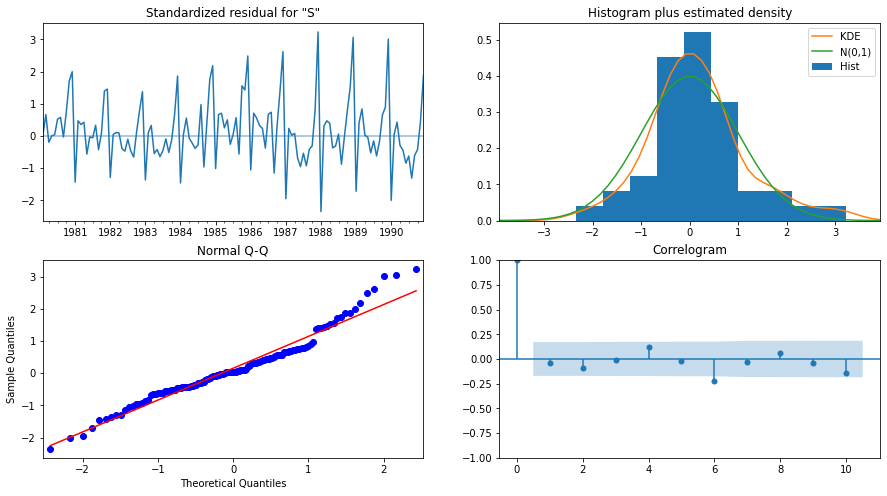

In [132]:
print("Diagboistics Plot")
results_auto_ARIMA.plot_diagnostics();

In [133]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [189]:
predicted_auto_ARIMA[0]

4252.367853771203

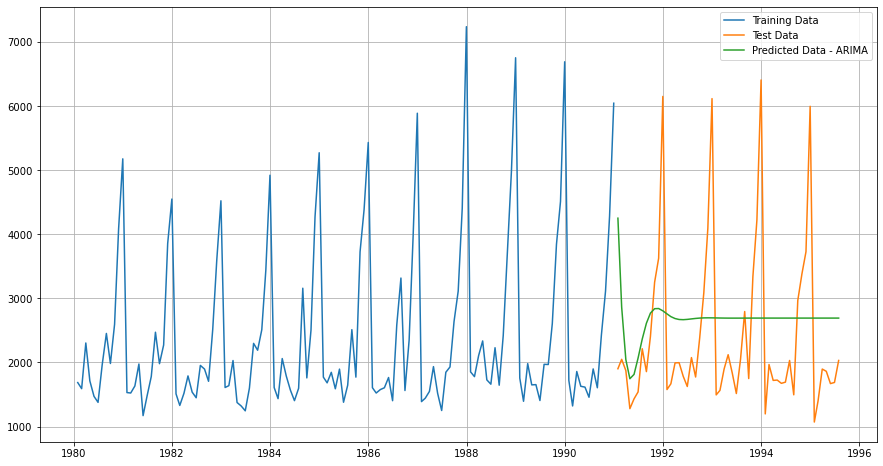

In [190]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,predicted_auto_ARIMA,label='Predicted Data - ARIMA')
plt.legend(loc='best')
plt.grid();

In [134]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA,squared=False)
print('RMSE:',rmse)

RMSE: 1299.9808693008124


In [135]:
resultsDf = pd.DataFrame({'RMSE': rmse}
                           ,index=['ARIMA(2,1,2)'])

resultsDf

,RMSE
"ARIMA(2,1,2)",1299.980869


sarima

acf plot  of training data


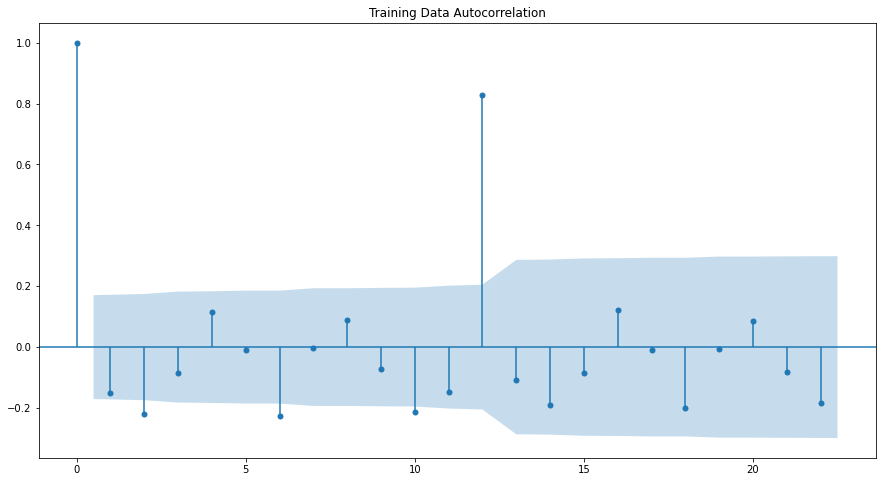

In [136]:
print("acf plot  of training data")
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop');

In [137]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (0, 1, 3)(0, 0, 3, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (1, 1, 3)(1, 0, 3, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)
Model: (2, 1, 3)(2, 0, 3, 6)
Model: (3, 1, 0)(3, 0, 0, 6)
Model: (3, 1, 1)(3, 0, 1, 6)
Model: (3, 1, 2)(3, 0, 2, 6)
Model: (3, 1, 3)(3, 0, 3, 6)


In [138]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [139]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:2152.378076171629
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1955.6355536889994
SARIMA(0, 1, 0)x(0, 0, 3, 6) - AIC:1863.7845154972952
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:2164.4097581959904
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:2079.5599844431026
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1926.9360121327015
SARIMA(0, 1, 0)x(1, 0, 3, 6) - AIC:1803.3929094952937
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1839.4012986872267
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1841.1993617510623


D:\anocondal\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1810.9177805661222
SARIMA(0, 1, 0)x(2, 0, 3, 6) - AIC:1725.5376425549302
SARIMA(0, 1, 0)x(3, 0, 0, 6) - AIC:1748.762266815527
SARIMA(0, 1, 0)x(3, 0, 1, 6) - AIC:1750.6879953816626
SARIMA(0, 1, 0)x(3, 0, 2, 6) - AIC:1739.4489858030327
SARIMA(0, 1, 0)x(3, 0, 3, 6) - AIC:1725.0138750179908
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:2230.162907850583
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:2130.5652859082797
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1918.1876339538546
SARIMA(0, 1, 1)x(0, 0, 3, 6) - AIC:1826.5285284600873
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:2139.57324287805
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:2006.517429813402
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1855.7093274165836
SARIMA(0, 1, 1)x(1, 0, 3, 6) - AIC:1737.6243229084566
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1798.7885103993947
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1800.771793308798
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1741.6414774909563
SARIMA(0, 1, 1)x(2, 0, 3, 6) - AIC:1659.2934088920758
SARIMA(0, 1, 1)x(3, 0, 0, 6) - AIC

In [140]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
187,"(2, 1, 3)","(2, 0, 3, 6)",1629.052955
59,"(0, 1, 3)","(2, 0, 3, 6)",1633.327871
191,"(2, 1, 3)","(3, 0, 3, 6)",1634.400488
251,"(3, 1, 3)","(2, 0, 3, 6)",1634.617364
63,"(0, 1, 3)","(3, 0, 3, 6)",1635.058644


In [141]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(2, 1, 3),
                                seasonal_order=(2, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

D:\anocondal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\anocondal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                     
Dep. Variable:                         Sparkling   No. Observations:                  132
Model:             SARIMAX(2, 1, 3)x(2, 0, 3, 6)   Log Likelihood                -803.526
Date:                           Sat, 22 May 2021   AIC                           1629.053
Time:                                   22:39:07   BIC                           1658.658
Sample:                               01-31-1980   HQIC                          1641.059
                                    - 12-31-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7440      0.090    -19.397      0.000      -1.920      -1.568
ar.L2         -0.7864      0.087     -9.041

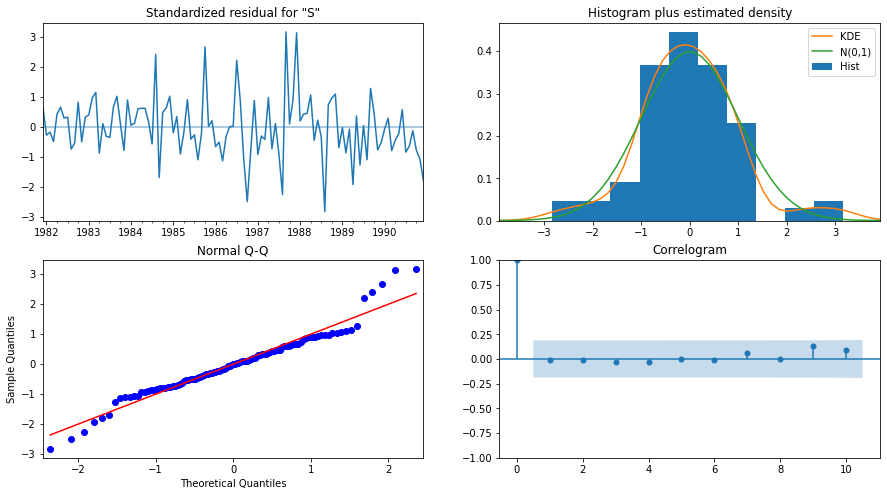

In [142]:
results_auto_SARIMA.plot_diagnostics();

In [143]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [144]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
1991-01-31,1341.884768,366.594038,623.373657,2060.395879
1991-02-28,994.152337,384.990943,239.583955,1748.720719
1991-03-31,1644.549627,385.224324,889.523827,2399.575428
1991-04-30,1571.731167,395.896391,795.788500,2347.673834
1991-05-31,1172.202397,396.068021,395.923341,1948.481453


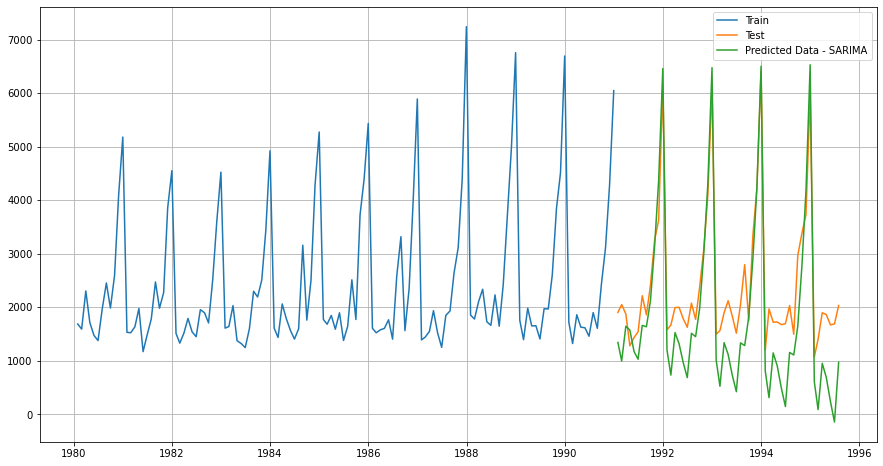

In [192]:
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')


plt.plot(test.index,predicted_auto_SARIMA.predicted_mean,label='Predicted Data - SARIMA')

plt.legend(loc='best')
plt.grid();

In [145]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA.predicted_mean,squared=False)

In [146]:
print('RMSE:',rmse)

RMSE: 820.6238123232409


In [147]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse}
                           ,index=['SARIMA(2,1,3)(2,0,3,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA(2,1,2)",1299.980869
"SARIMA(2,1,3)(2,0,3,6)",820.623812


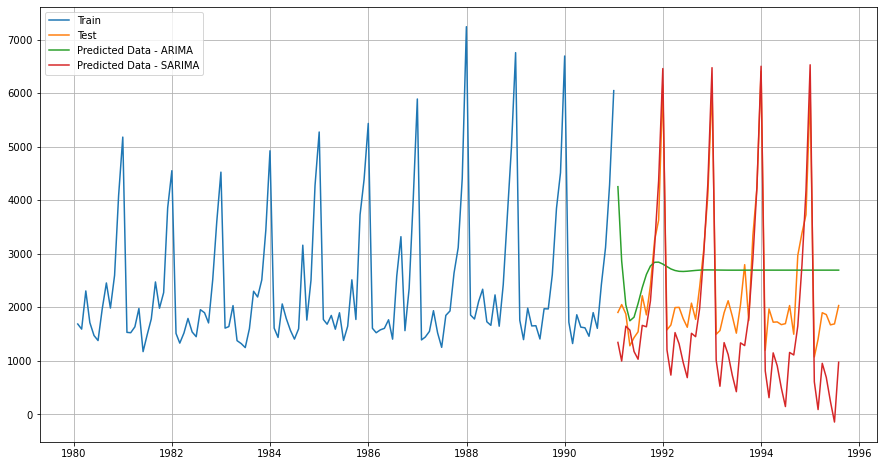

In [191]:
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(test.index,predicted_auto_ARIMA,label='Predicted Data - ARIMA')
plt.plot(test.index,predicted_auto_SARIMA.predicted_mean,label='Predicted Data - SARIMA')

plt.legend(loc='best')
plt.grid();

## Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

### Arima

 ACF and the PACF plots of training data 


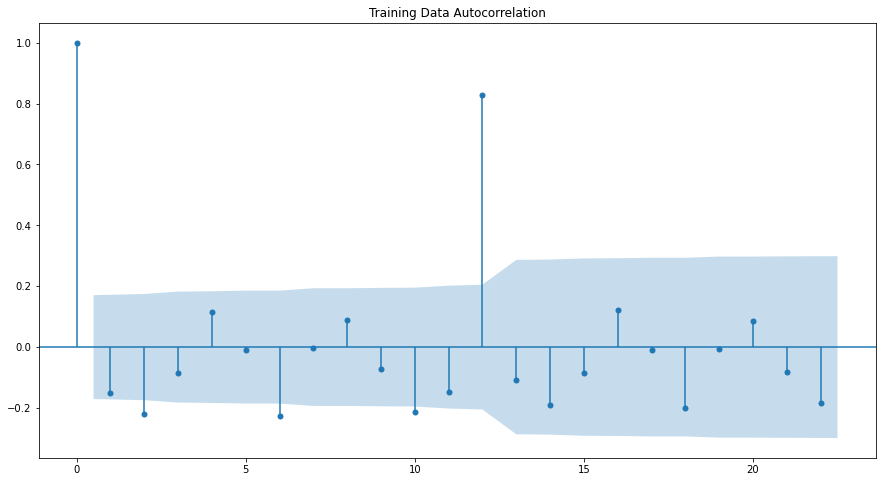

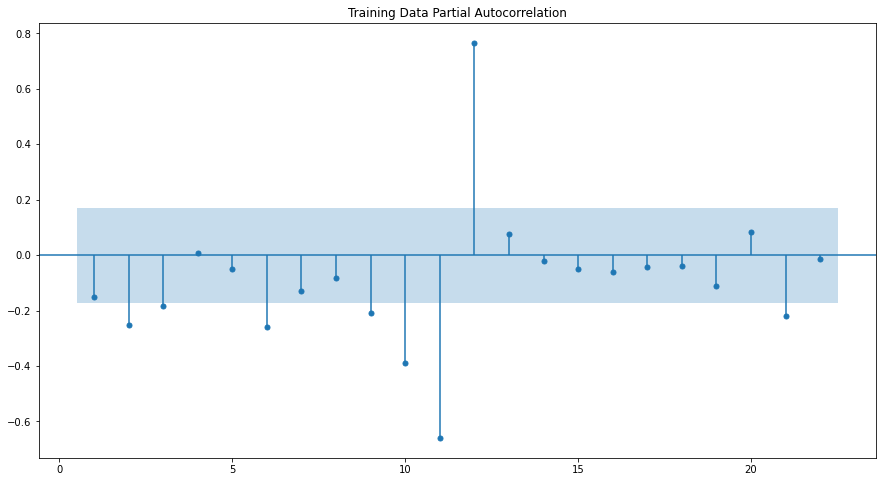

In [193]:
print(" ACF and the PACF plots of training data ")
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False);

In [149]:
manual_ARIMA = ARIMA(train['Sparkling'], order=(3,1,2),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

D:\anocondal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -1109.377
Date:                Sat, 22 May 2021   AIC                           2230.755
Time:                        22:39:08   BIC                           2248.006
Sample:                    01-31-1980   HQIC                          2237.765
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4328      0.040    -10.743      0.000      -0.512      -0.354
ar.L2          0.3244      0.112      2.903      0.004       0.105       0.543
ar.L3         -0.2428      0.072     -3.395      0.0

D:\anocondal\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


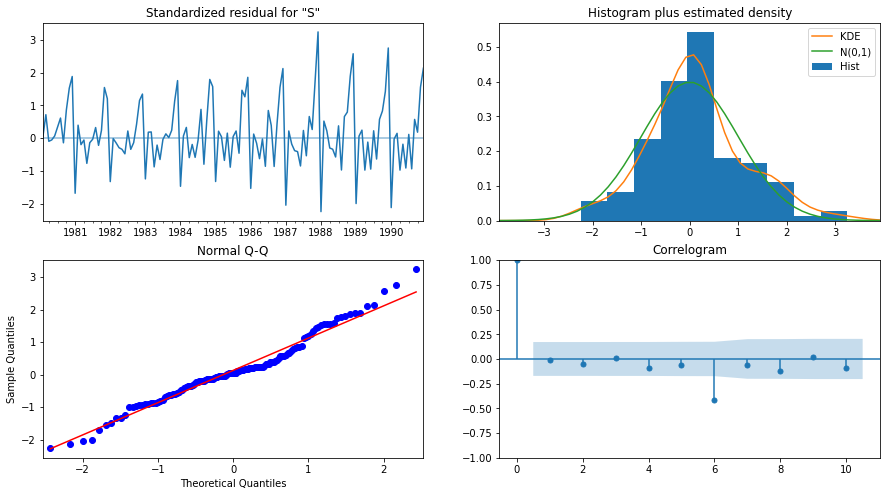

In [150]:
results_manual_ARIMA.plot_diagnostics();

In [195]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

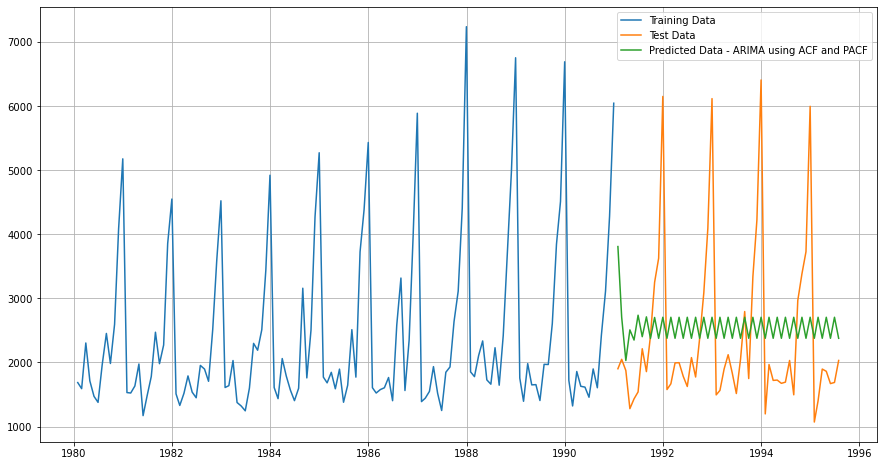

In [196]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,predicted_manual_ARIMA,label='Predicted Data - ARIMA using ACF and PACF')
plt.legend(loc='best')
plt.grid();

In [204]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA,squared=False)
rmsea=rmse
print('RMSE:',rmse)

RMSE: 1281.7511774185691


In [153]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse}
                           ,index=['ARIMA M(3,1,2)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA(2,1,2)",1299.980869
"SARIMA(2,1,3)(2,0,3,6)",820.623812
"ARIMA M(3,1,2)",1281.751177


 ACF and the PACF plots of training data 


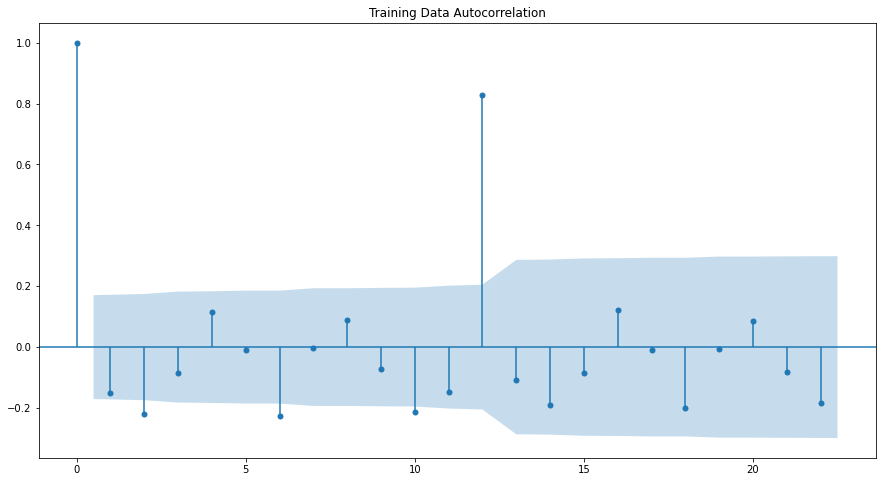

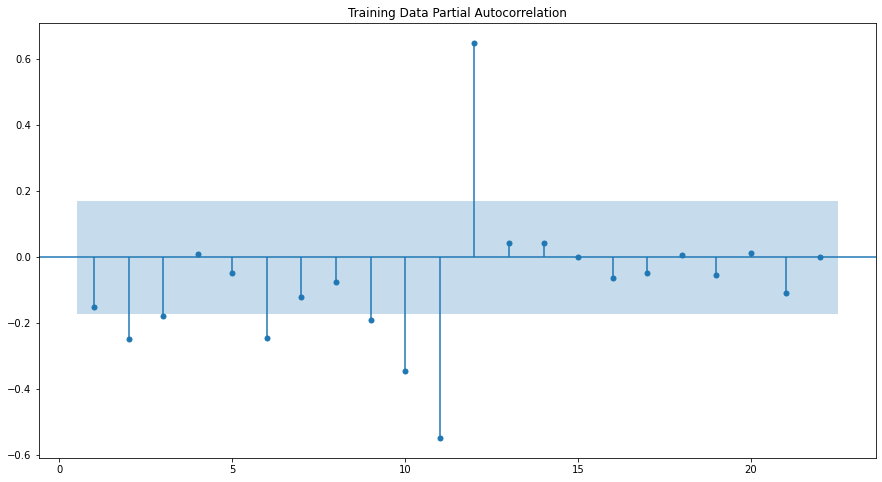

In [154]:
print(" ACF and the PACF plots of training data ")
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle');

In [200]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(3,1,2),
                                seasonal_order=(3, 0, 0, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

D:\anocondal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\anocondal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  132
Model:             SARIMAX(3, 1, 2)x(3, 0, [], 6)   Log Likelihood                -822.494
Date:                            Sun, 23 May 2021   AIC                           1662.989
Time:                                    02:35:32   BIC                           1687.293
Sample:                                01-31-1980   HQIC                          1672.847
                                     - 12-31-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5675      0.189     -2.999      0.003      -0.938      -0.197
ar.L2          0.0952      0.108   

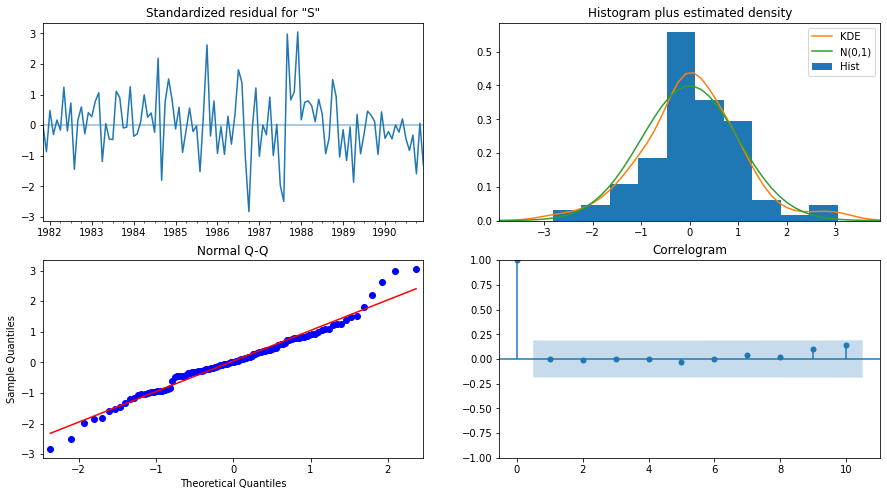

In [157]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

In [158]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))

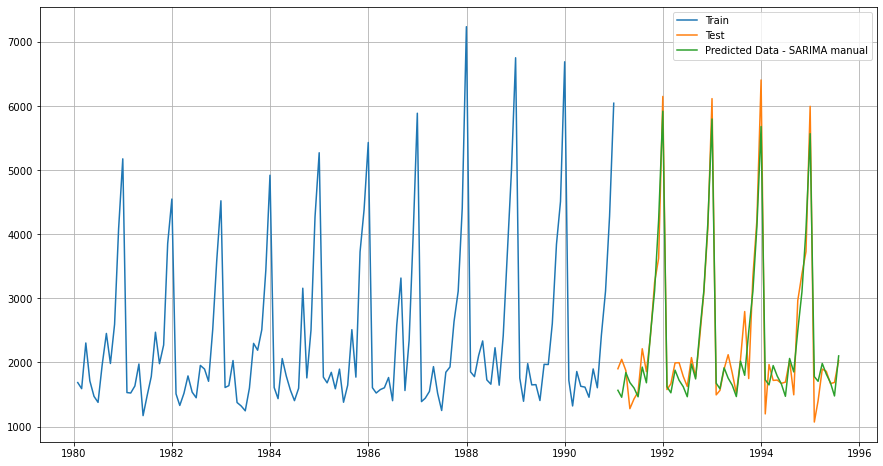

In [201]:
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')


plt.plot(test.index,predicted_manual_SARIMA.predicted_mean,label='Predicted Data - SARIMA manual')

plt.legend(loc='best')
plt.grid();

In [206]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA.predicted_mean,squared=False)
print('RMSE:',rmse)

RMSE: 321.8681761919399


In [207]:
temp_resultsDf = pd.DataFrame({'RMSE': rmsea}
                           ,index=['ARIMA M(3,1,2)'])

temp_resultsDf2 = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA M(3,1,2)(3,0,0,6)'])

resultsDf1 = pd.concat([temp_resultsDf,temp_resultsDf2])
resultsDf1

,RMSE
"ARIMA M(3,1,2)",1281.751177
"SARIMA M(3,1,2)(3,0,0,6)",321.868176


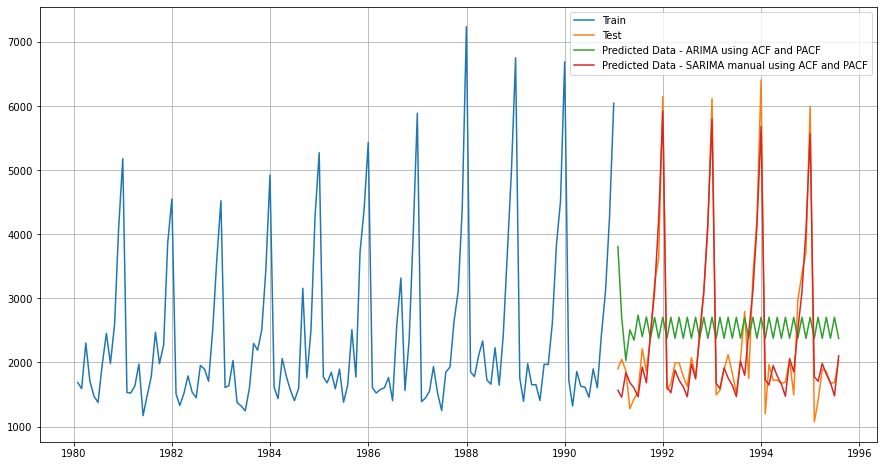

In [208]:
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(test.index,predicted_manual_ARIMA,label='Predicted Data - ARIMA using ACF and PACF')
plt.plot(test.index,predicted_manual_SARIMA.predicted_mean,label='Predicted Data - SARIMA manual using ACF and PACF')

plt.legend(loc='best')
plt.grid();

In [160]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA M(3,1,2)(3,0,0,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])


resultsDf

,RMSE
"ARIMA(2,1,2)",1299.980869
"SARIMA(2,1,3)(2,0,3,6)",820.623812
"ARIMA M(3,1,2)",1281.751177
"SARIMA M(3,1,2)(3,0,0,6)",321.868176


## Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [209]:
def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [210]:
resultsDf = pd.DataFrame({'Test RMSE': [em.rmse(test.values,SES_predict.values)[0]],'MAPE':MAPE(test.values,SES_predict.values) },index=['SES (Alpha=0.0702)'])
resultsDf

,Test RMSE,MAPE
SES (Alpha=0.0702),1338.004623,53.879778


In [211]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)],'MAPE':MAPE(test.values,DES_predict.values)}
                           ,index=['DES (Alpha=0.6649,Beta=0.0001)'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE,MAPE
SES (Alpha=0.0702),1338.004623,53.879778
"DES (Alpha=0.6649,Beta=0.0001)",5291.879833,268.912388


In [212]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)],'MAPE':MAPE(test.values,TES_predict.values)}
                           ,index=['TES  (Alpha=0.1112,Beta=0.01236,Gamma=0.4607):Addictive '])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE,MAPE
SES (Alpha=0.0702),1338.004623,53.879778
"DES (Alpha=0.6649,Beta=0.0001)",5291.879833,268.912388
"TES (Alpha=0.1112,Beta=0.01236,Gamma=0.4607):Addictive",378.626241,53.618933


In [213]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)],'MAPE':MAPE(test.values,TES_predict_am.values)}
                           ,index=['TES (Alpha=0.1111,Beta=0.0494,Gamma=0.3620):Multiplicative'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE,MAPE
SES (Alpha=0.0702),1338.004623,53.879778
"DES (Alpha=0.6649,Beta=0.0001)",5291.879833,268.912388
"TES (Alpha=0.1112,Beta=0.01236,Gamma=0.4607):Addictive",378.626241,53.618933
"TES (Alpha=0.1111,Beta=0.0494,Gamma=0.3620):Multiplicative",403.706228,48.365465


In [214]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test['Sparkling'],test_predictions_lr,squared=False)],'MAPE':MAPE(test.values,test_predictions_lr)},
                              index=['Regression'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE,MAPE
SES (Alpha=0.0702),1338.004623,53.879778
"DES (Alpha=0.6649,Beta=0.0001)",5291.879833,268.912388
"TES (Alpha=0.1112,Beta=0.01236,Gamma=0.4607):Addictive",378.626241,53.618933
"TES (Alpha=0.1111,Beta=0.0494,Gamma=0.3620):Multiplicative",403.706228,48.365465
Regression,1389.135175,59.410392


In [215]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)],'MAPE':MAPE(test.values,NaiveModel_test['naive'].values)},
                              index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf



,Test RMSE,MAPE
SES (Alpha=0.0702),1338.004623,53.879778
"DES (Alpha=0.6649,Beta=0.0001)",5291.879833,268.912388
"TES (Alpha=0.1112,Beta=0.01236,Gamma=0.4607):Addictive",378.626241,53.618933
"TES (Alpha=0.1111,Beta=0.0494,Gamma=0.3620):Multiplicative",403.706228,48.365465
Regression,1389.135175,59.410392
NaiveModel,3864.279352,201.327650


In [216]:

resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)],'MAPE':MAPE(test.values,SimpleAverage_test['mean_forecast'].values)},
                              index=['SimpleAverage '])
resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf


,Test RMSE,MAPE
SES (Alpha=0.0702),1338.004623,53.879778
"DES (Alpha=0.6649,Beta=0.0001)",5291.879833,268.912388
"TES (Alpha=0.1112,Beta=0.01236,Gamma=0.4607):Addictive",378.626241,53.618933
"TES (Alpha=0.1111,Beta=0.0494,Gamma=0.3620):Multiplicative",403.706228,48.365465
Regression,1389.135175,59.410392
NaiveModel,3864.279352,201.327650
SimpleAverage,1275.081804,39.157336


In [217]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test['Sparkling'],predicted_auto_ARIMA,squared=False)],'MAPE':MAPE(test['Sparkling'],predicted_auto_ARIMA)},
                              index=['Arima (2,1,2) : Low AIC'])
resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE,MAPE
SES (Alpha=0.0702),1338.004623,53.879778
"DES (Alpha=0.6649,Beta=0.0001)",5291.879833,268.912388
"TES (Alpha=0.1112,Beta=0.01236,Gamma=0.4607):Addictive",378.626241,53.618933
"TES (Alpha=0.1111,Beta=0.0494,Gamma=0.3620):Multiplicative",403.706228,48.365465
Regression,1389.135175,59.410392
NaiveModel,3864.279352,201.327650
SimpleAverage,1275.081804,39.157336
"Arima (2,1,2) : Low AIC",1299.980869,47.100060


In [218]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test['Sparkling'],predicted_auto_SARIMA.predicted_mean,squared=False)],'MAPE':MAPE(test['Sparkling'],predicted_auto_SARIMA.predicted_mean)},
                              index=['Sarima (2, 1, 3)(2, 0, 3,6), :Low AIC'])
resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE,MAPE
SES (Alpha=0.0702),1338.004623,53.879778
"DES (Alpha=0.6649,Beta=0.0001)",5291.879833,268.912388
"TES (Alpha=0.1112,Beta=0.01236,Gamma=0.4607):Addictive",378.626241,53.618933
"TES (Alpha=0.1111,Beta=0.0494,Gamma=0.3620):Multiplicative",403.706228,48.365465
Regression,1389.135175,59.410392
NaiveModel,3864.279352,201.327650
SimpleAverage,1275.081804,39.157336
"Arima (2,1,2) : Low AIC",1299.980869,47.100060
"Sarima (2, 1, 3)(2, 0, 3,6), :Low AIC",820.623812,36.126725


In [219]:

resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test['Sparkling'],predicted_manual_ARIMA,squared=False)],'MAPE':MAPE(test['Sparkling'],predicted_manual_ARIMA)},
                              index=['Arima (3,1,2) : cut-off points of ACF and PACF'])
resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE,MAPE
SES (Alpha=0.0702),1338.004623,53.879778
"DES (Alpha=0.6649,Beta=0.0001)",5291.879833,268.912388
"TES (Alpha=0.1112,Beta=0.01236,Gamma=0.4607):Addictive",378.626241,53.618933
"TES (Alpha=0.1111,Beta=0.0494,Gamma=0.3620):Multiplicative",403.706228,48.365465
Regression,1389.135175,59.410392
NaiveModel,3864.279352,201.327650
SimpleAverage,1275.081804,39.157336
"Arima (2,1,2) : Low AIC",1299.980869,47.100060
"Sarima (2, 1, 3)(2, 0, 3,6), :Low AIC",820.623812,36.126725
"Arima (3,1,2) : cut-off points of ACF and PACF",1281.751177,44.067516


In [220]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test['Sparkling'],predicted_manual_SARIMA.predicted_mean,squared=False)],'MAPE':MAPE(test['Sparkling'],predicted_manual_SARIMA.predicted_mean)},
                              index=['Sarima (3, 1, 2)(3, 0, 0,6), :cut-off points of ACF and PACF'])
resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE,MAPE
SES (Alpha=0.0702),1338.004623,53.879778
"DES (Alpha=0.6649,Beta=0.0001)",5291.879833,268.912388
"TES (Alpha=0.1112,Beta=0.01236,Gamma=0.4607):Addictive",378.626241,53.618933
"TES (Alpha=0.1111,Beta=0.0494,Gamma=0.3620):Multiplicative",403.706228,48.365465
Regression,1389.135175,59.410392
NaiveModel,3864.279352,201.327650
SimpleAverage,1275.081804,39.157336
"Arima (2,1,2) : Low AIC",1299.980869,47.100060
"Sarima (2, 1, 3)(2, 0, 3,6), :Low AIC",820.623812,36.126725
"Arima (3,1,2) : cut-off points of ACF and PACF",1281.751177,44.067516


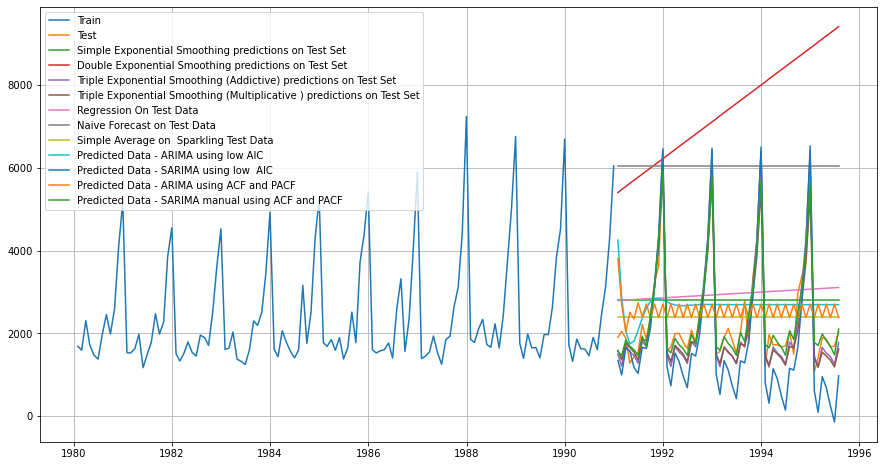

In [238]:
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(SES_predict, label='Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Triple Exponential Smoothing (Addictive) predictions on Test Set')
plt.plot(TES_predict_am, label='Triple Exponential Smoothing (Multiplicative ) predictions on Test Set')
plt.plot(LinearRegression_test['Regression'], label='Regression On Test Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on  Sparkling Test Data')
plt.plot(test.index,predicted_auto_ARIMA,label='Predicted Data - ARIMA using low AIC  ')
plt.plot(test.index,predicted_auto_SARIMA.predicted_mean,label='Predicted Data - SARIMA using low  AIC ')
plt.plot(test.index,predicted_manual_ARIMA,label='Predicted Data - ARIMA using ACF and PACF')
plt.plot(test.index,predicted_manual_SARIMA.predicted_mean,label='Predicted Data - SARIMA manual using ACF and PACF')



plt.legend(loc='best')
plt.grid();

## Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [173]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Sparkling'],
                                order=(3,1,2),
                                seasonal_order=(3, 0, 0, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

D:\anocondal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\anocondal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  187
Model:             SARIMAX(3, 1, 2)x(3, 0, [], 6)   Log Likelihood               -1232.468
Date:                            Sat, 22 May 2021   AIC                           2482.937
Time:                                    22:39:13   BIC                           2510.890
Sample:                                01-31-1980   HQIC                          2494.284
                                     - 07-31-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7886      0.111     -7.110      0.000      -1.006      -0.571
ar.L2          0.0090      0.085   

In [174]:
predicted_manual_SARIMA_full_sparkling_data = results_full_data_model.get_forecast(steps=12)

In [175]:
pred_full_manual_SARIMA_sparkling_date = predicted_manual_SARIMA_full_sparkling_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_sparkling_date.head()

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-31,1561.095664,419.265586,739.350216,2382.841112
1995-09-30,2941.474690,423.818058,2110.806561,3772.142820
1995-10-31,3395.394296,425.725937,2560.986793,4229.801799
1995-11-30,3671.463183,426.065904,2836.389357,4506.537010
1995-12-31,5889.376449,426.229438,5053.982102,6724.770796


In [224]:
pred_full_manual_SARIMA_sparkling_date

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-31,1561.095664,419.265586,739.350216,2382.841112
1995-09-30,2941.474690,423.818058,2110.806561,3772.142820
1995-10-31,3395.394296,425.725937,2560.986793,4229.801799
1995-11-30,3671.463183,426.065904,2836.389357,4506.537010
1995-12-31,5889.376449,426.229438,5053.982102,6724.770796
1996-01-31,1124.170746,426.537103,288.173385,1960.168107
1996-02-29,1481.877984,426.632242,645.694155,2318.061812
1996-03-31,1910.606815,426.901454,1073.895340,2747.318291
1996-04-30,1897.471966,426.964542,1060.636840,2734.307091
1996-05-31,1686.959291,427.094318,849.869809,2524.048773


In [225]:
pred_full_manual_SARIMA_sparkling_date.describe()

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
count,12.000000,12.000000,12.000000,12.000000
mean,2443.611943,425.794576,1609.069908,3278.153978
std,1342.818304,2.256646,1342.687748,1342.963414
min,1124.170746,419.265586,288.173385,1960.168107
25%,1655.493384,425.980912,822.239911,2488.746857
50%,1904.039390,426.584673,1067.266090,2740.812691
75%,3054.954592,426.996986,2223.351619,3886.557565
max,5889.376449,427.192424,5053.982102,6724.770796


In [233]:
meanvaluepred=pred_full_manual_SARIMA_sparkling_date['mean']
meanvaluepred

1995-08-31    1561.095664
1995-09-30    2941.474690
1995-10-31    3395.394296
1995-11-30    3671.463183
1995-12-31    5889.376449
1996-01-31    1124.170746
1996-02-29    1481.877984
1996-03-31    1910.606815
1996-04-30    1897.471966
1996-05-31    1686.959291
1996-06-30    1695.860447
1996-07-31    2067.591788
Freq: M, Name: mean, dtype: float64

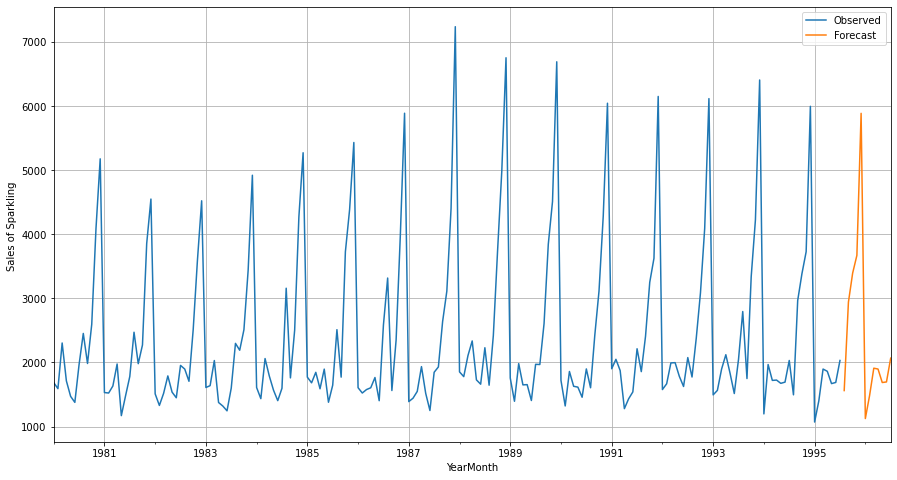

In [176]:
axis = df['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA_sparkling_date['mean'].plot(ax=axis, label='Forecast')

axis.set_xlabel('YearMonth')
axis.set_ylabel('Sales of Sparkling ')
plt.legend(loc='best')
plt.grid();

In [ ]:
##Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.

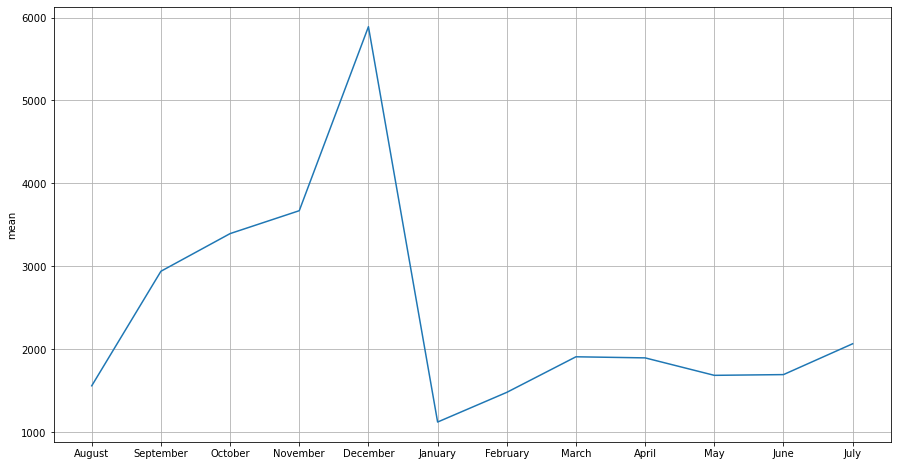

In [228]:
sns.lineplot(x = pred_full_manual_SARIMA_sparkling_date.index.month_name(),y = pred_full_manual_SARIMA_sparkling_date['mean'])
plt.grid();